In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Description

In [3]:
# pH of water  (for drinkable water should be between 6,5 and 9,5)
# Hardness - Capacity of water to precipitate soap in mg/L  (for drinkable water max is 500)
# Solids - Total dissolved solids in ppm (for drinkable water max is 500ppm)
# Chloramines - Amount of Chloramines in ppm (for drinkable water max is 4ppm)
# Sulfate - Amount of Sulfates dissolved in mg/L (for drinkable water max is 250)
# Conductivity - Electrical conductivity of water in μS/cm (for drinkable water max is 2500)
# Organic_carbon - Amount of organic carbon in ppm (for drinkable water max 10ppm)
# Trihalomethanes - Amount of Trihalomethanes in μg/L (max 100)
# Turbidity - Measure of light emiting property of water in NTU (Nephelometric Turbidity Units) (max 1NTU)
# Potability - indicates if water is safe for human consumption (1 - drinkable, 0 - not drinkable)

# Importing The Dataset

In [2]:
df=pd.read_csv('waterpotability.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3267.000000,3267.000000,3267.000000,2495.000000,3267.000000,3267.000000,3114.000000,3267.000000,3267.000000
mean,7.080795,196.366063,22013.423893,7.123074,333.775777,426.144283,14.288057,66.396293,3.966987,0.396388
std,1.594320,32.893960,8760.888319,1.583597,41.416840,80.787862,3.308664,16.175008,0.780835,0.489222
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.847379,15665.106976,6.128488,307.699498,365.729707,12.066072,55.844536,3.439682,0.000000
50%,7.036752,196.952875,20965.478309,7.130437,333.073546,421.879854,14.221757,66.622485,3.955154,0.000000
75%,8.062066,216.660337,27334.162293,8.115043,359.950170,481.609194,16.559152,77.337473,4.500432,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3267 non-null   float64
 2   Solids           3267 non-null   float64
 3   Chloramines      3267 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3267 non-null   float64
 6   Organic_carbon   3267 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3267 non-null   float64
 9   Potability       3267 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 255.4 KB


array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

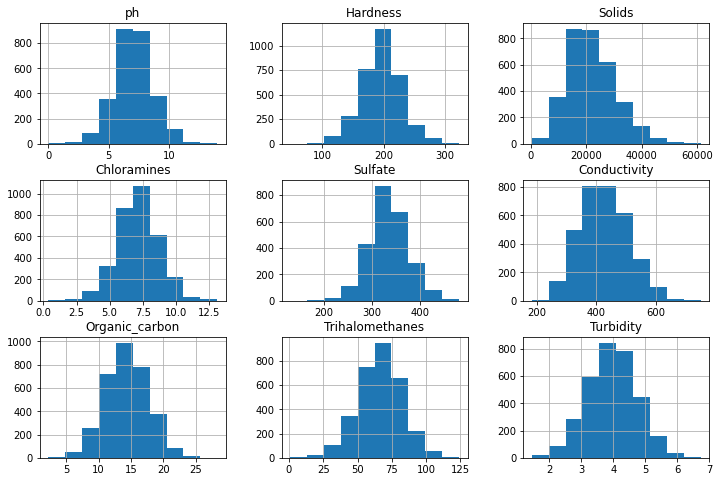

In [22]:
df.drop('Potability', axis=1).hist(figsize=(12,8))

In [70]:
cor=df.drop('Potability',axis=1).corr()
cor

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.075835,-0.082187,-0.031787,0.014177,0.017517,0.040266,0.003146,-0.036142
Hardness,0.075835,1.000000,-0.047814,-0.030674,-0.092919,-0.023414,0.004719,-0.012720,-0.015414
Solids,-0.082187,-0.047814,1.000000,-0.072385,-0.150084,0.013918,0.009512,-0.008820,0.018824
Chloramines,-0.031787,-0.030674,-0.072385,1.000000,0.023779,-0.019203,-0.013751,0.016638,0.002106
Sulfate,0.014177,-0.092919,-0.150084,0.023779,1.000000,-0.014197,0.027122,-0.025657,-0.009779
Conductivity,0.017517,-0.023414,0.013918,-0.019203,-0.014197,1.000000,0.021542,0.001176,0.004976
Organic_carbon,0.040266,0.004719,0.009512,-0.013751,0.027122,0.021542,1.000000,-0.012961,-0.026861
Trihalomethanes,0.003146,-0.012720,-0.008820,0.016638,-0.025657,0.001176,-0.012961,1.000000,-0.021500
Turbidity,-0.036142,-0.015414,0.018824,0.002106,-0.009779,0.004976,-0.026861,-0.021500,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

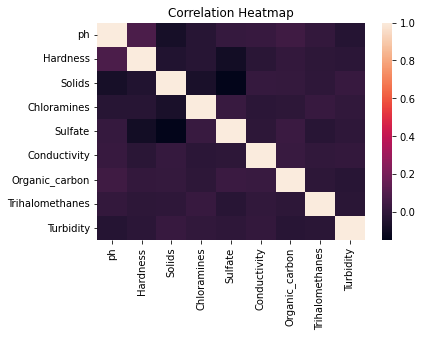

In [76]:
fig = sns.heatmap(cor)

fig.set_title('Correlation Heatmap')

#### As we can see, there seems to be very less correlation between all the features.

# Visualisations of meansures with null values

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.15, 2, 'Min ph for drinkable water is 6,5')

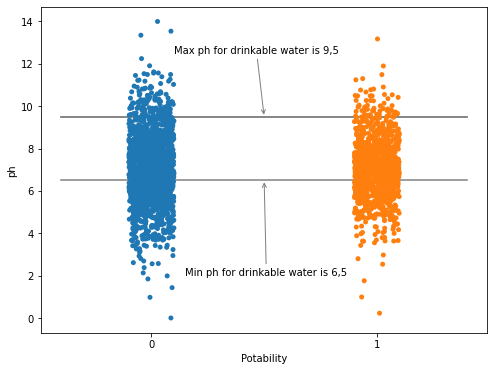

In [62]:
plt.figure(figsize=(8,6))
ax = sns.stripplot(x='Potability', y='ph', data=df)
a = [-0.4,1.4]
b = [9.5,9.5]
sns.lineplot(a,b, color='gray')
c = [-0.4,1.4]
d = [6.5,6.5]
sns.lineplot(a,b, color='gray')
xx=sns.lineplot(c,d, color='gray')
ax.annotate('Max ph for drinkable water is 9,5', xy=[0.5,9.5], 
           xytext=[0.1,12.5],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
xx.annotate('Min ph for drinkable water is 6,5', xy=[0.5,6.5], 
           xytext=[0.15,2],
           arrowprops={'arrowstyle': '->', 'color':'gray'})

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-0.25, 150, 'Max sulfate for drinkable water is 250 mg/L')

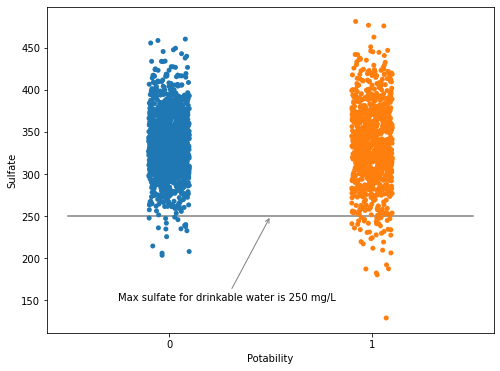

In [51]:
plt.figure(figsize=(8,6))
ax = sns.stripplot(x='Potability', y='Sulfate', data=df)
a = [-0.5,1.5]
b = [250,250]
sns.lineplot(a,b, color='gray')
ax.annotate('Max sulfate for drinkable water is 250 mg/L', xy=[0.5,250], 
           xytext=[-0.25,150],
           arrowprops={'arrowstyle': '->', 'color':'gray'})

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-0.6, 125, 'Max Trihalomethanes for drinkable water is 100 μg/L')

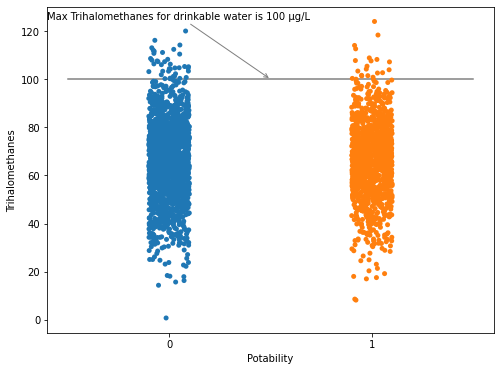

In [50]:
plt.figure(figsize=(8,6))
ax = sns.stripplot(x='Potability', y='Trihalomethanes', data=df)
a = [-0.5,1.5]
b = [100,100]
sns.lineplot(a,b, color='gray')
ax.annotate('Max Trihalomethanes for drinkable water is 100 μg/L', xy=[0.5,100], 
           xytext=[-0.6,125],
           arrowprops={'arrowstyle': '->', 'color':'gray'})

# Data Preparation - dealing with missing values

In [63]:
class0=df[df['Potability']==0]
class0.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1666.000000,1972.000000,1972.000000,1972.000000,1496.000000,1972.000000,1972.000000,1873.000000,1972.000000,1972.0
mean,7.065088,196.666961,21784.258743,7.138191,334.573923,426.729451,14.367967,66.494113,3.968688,0.0
std,1.686784,31.060029,8516.488947,1.447627,36.546200,80.039288,3.348760,16.250336,0.782188,0.0
min,0.000000,98.452931,320.942611,2.562255,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.008367,177.799573,15715.740730,6.193384,311.318216,368.450634,12.091922,55.816510,3.444706,0.0
50%,6.992004,197.039446,20838.587290,7.105432,333.389426,422.145751,14.293508,66.659352,3.954840,0.0
75%,8.135558,216.016872,27011.592306,8.075655,356.769499,481.151513,16.665328,77.382841,4.501133,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [64]:
class1=df[df['Potability']==1]
class1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1119.000000,1295.000000,1295.000000,1295.000000,999.000000,1295.000000,1295.000000,1241.000000,1295.000000,1295.0
mean,7.104179,195.907862,22362.391981,7.100053,332.580554,425.253200,14.166372,66.248657,3.964396,1.0
std,1.446165,35.512683,9112.756940,1.771052,47.786216,81.937682,3.244159,16.066057,0.779065,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.229919,174.380497,15638.128264,6.031752,300.991432,360.945241,12.052522,55.876641,3.428401,1.0
50%,7.071314,196.791251,21190.154943,7.166639,331.838167,420.830866,14.168314,66.608891,3.957012,1.0
75%,7.967691,218.185080,27968.799685,8.182988,365.951302,483.380949,16.352385,77.286551,4.498377,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [65]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   6.992004
Sulfate            333.389426
Trihalomethanes     66.659352
dtype: float64

In [66]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.071314
Sulfate            331.838167
Trihalomethanes     66.608891
dtype: float64

#### We can see that the difference between the mean and median values of Potable and Non-Potable Water is minimal. So we use the overall median of the feature to impute the values

In [67]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [68]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Standardizing The Data

In [77]:
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [78]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
X_train

array([[ 0.5334172 ,  0.07439224, -0.18176156, ...,  0.65520782,
         0.01811387,  0.45656846],
       [ 0.64052317, -0.81992826, -0.32775598, ...,  0.25865315,
         0.10576128, -0.27640969],
       [-1.59000645,  1.67739712,  0.09499178, ...,  0.68006443,
         0.02483385, -0.04687397],
       ...,
       [ 0.00589606, -0.12579489,  0.40549248, ...,  0.06304028,
        -0.14038049,  0.04825213],
       [ 0.46175963, -0.69036951, -0.74536395, ..., -0.94829111,
         1.34153737, -0.88269954],
       [ 0.05829301,  0.4949176 ,  1.23919555, ..., -0.4882365 ,
        -0.51292191,  1.31896164]])

# Modelling - spot checking

In [86]:
# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [87]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("NC",NearestCentroid()), ("Ridge", RidgeClassifier()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [88]:
finalResults

[('SVC', 0.6651362011586344),
 ('KNN', 0.6496648115355427),
 ('RF', 0.646320359463234),
 ('XGB', 0.6276759389821818),
 ('LR', 0.6125),
 ('Ridge', 0.6125),
 ('GNB', 0.5996365446511374),
 ('ADA', 0.5586032741205156),
 ('DTC', 0.5502734315013564),
 ('PAC', 0.5268726444723618),
 ('NC', 0.487653191878544),
 ('SGDC', 0.484095274683058)]

#### I chose the top 4 baseline models and performed Hyperparameter tuning to it. 

# Hyperparameter Tuning